In [42]:
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome

import ujson
import requests

from kiwipiepy import Kiwi

import pandas as pd
import matplotlib.pyplot as plt

#필요한 모듈 미리 호출

In [ ]:
driver = Chrome("chromedriver")

In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

In [4]:
BASE_URL = "https://www.yuhan-kimberly.co.kr/Newsroom/News?pageNo={}&pageUnit=12&pageSize=&searchKeyword="
PAGE_URL = "https://www.yuhan-kimberly.co.kr{}"

In [ ]:
#2021-2022 최근 기사 url수집. "위드코로나"
#1page ~ 8page
from ordered_set import OrderedSet
news_items_url1 = OrderedSet()
for i in range (1,9):
    print("페이지 수집중...")
    driver.get(BASE_URL.format(i))
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    urls = soup.select("ul.board_news.clearfix li > a")
    for url in urls: #urls에 저장된 url을 하나씩 불러와 news_items_url1에 추가
        news_items_url1.append(url.attrs["href"])


In [ ]:
# news1에 코로나진행단계, 제목, 날짜, 본문, 형태소분석결과 넣기
from kiwipiepy import Kiwi
kiwi = Kiwi()
import time
CHK_POS = {
    "NNG",     # 일반명사
    "NNP",     # 고유명사
    "XR",      # 어근
    "NP"      # 대명사
}

news1 = []
for idx, url in enumerate(news_items_url1): #크롤링 중인 페이지 파악 위해 idx, enumerate 사용
    
    if idx % 10 == 0:
        print(f"현재 {idx+1}/{len(news_items_url1)} 크롤링 중")
        
    driver.get(PAGE_URL.format(url)) #url형태가 완전하지 않으므로 형식 지정
    time.sleep(0.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    covid_19 = "위드코로나" #나중에 통합된 jsonl을 만들고 빈도분석할 때 분류기준으로 사용하기 위함.
    title = soup.select_one("div.title_box p.title").text.strip()
    date_posted = soup.select_one("p.date").text.strip()
    content = soup.select_one("div.view_content").text.strip()
    content_morph = []
    for token in kiwi.tokenize(content):
        if tuple(token)[1] in CHK_POS: #형태소 분석. CHK_POS에 저장해놓은 품사와 일치한다면,
                content_morph.append(tuple(token)[:2]) #conten_morph에 해당 단어와 품사 저장 (0번째,1번째 인덱스)

    
    news1.append({
        "covid": covid_19,
        "title": title,
        "date_posted": date_posted,
        "content": content,
        "content_morph": content_morph #딕셔너리 형태로 리스트에 추가
    })
    

In [9]:
##2020 기사 url수집. "코로나 팬데믹"
#9page-15page
from ordered_set import OrderedSet
news_items_url2 = OrderedSet()
for i in range (9,16):
    print("페이지 수집중...")
    driver.get(BASE_URL.format(i))
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    urls = soup.select("ul.board_news.clearfix li > a")
    for url in urls:
        news_items_url2.append(url.attrs["href"])


페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...


In [ ]:
# news2에 코로나진행단계, 제목, 날짜, 본문, 형태소분석결과 넣기
CHK_POS = {
    "NNG",     # 일반명사
    "NNP",     # 고유명사
    "XR",      # 어근
    "NP"      # 대명사
}
news2 = []
for idx, url in enumerate(news_items_url2):
    
    if idx % 10 == 0:
        print(f"현재 {idx+1}/{len(news_items_url2)} 크롤링 중")
        
    driver.get(PAGE_URL.format(url))
    time.sleep(0.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    covid_19 = "코로나팬데믹"
    title = soup.select_one("div.title_box p.title").text.strip()
    date_posted = soup.select_one("p.date").text.strip()
    content = soup.select_one("div.view_content").text.strip()
    content_morph = []
    for token in kiwi.tokenize(content):
        if tuple(token)[1] in CHK_POS:
            content_morph.append(tuple(token)[:2])
    
    news2.append({
        "covid" : covid_19,
        "title": title,
        "date_posted": date_posted,
        "content": content,
        "content_morph": content_morph
    })
    

In [10]:
##2018-2019 기사 url수집. "코로나 이전"
#16page-21page
from ordered_set import OrderedSet
news_items_url3 = OrderedSet()
for i in range (16,22):
    print("페이지 수집중...")
    driver.get(BASE_URL.format(i))
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    urls = soup.select("ul.board_news.clearfix li > a")
    for url in urls:
        news_items_url3.append(url.attrs["href"])


페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...


In [16]:
# news3에 코로나진행단계, 제목, 날짜, 본문, 형태소분석결과 넣기
CHK_POS = {
    "NNG",     # 일반명사
    "NNP",     # 고유명사
    "XR",      # 어근
    "NP"      # 대명사
}

news3 = []
for idx, url in enumerate(news_items_url3):
    
    if idx % 10 == 0:
        print(f"현재 {idx+1}/{len(news_items_url3)} 크롤링 중")
        
    driver.get(PAGE_URL.format(url))
    time.sleep(0.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    covid_19 = "코로나이전"
    title = soup.select_one("div.title_box p.title").text.strip()
    date_posted = soup.select_one("p.date").text.strip()
    content = soup.select_one("div.view_content").text.strip()
    content_morph = []
    for token in kiwi.tokenize(content):
        if tuple(token)[1] in CHK_POS:
            content_morph.append(tuple(token)[:2])
    
    news3.append({
        "covid" : covid_19,
        "title": title,
        "date_posted": date_posted,
        "content": content,
        "content_morph": content_morph
    })
    

현재 1/72 크롤링 중
현재 11/72 크롤링 중
현재 21/72 크롤링 중
현재 31/72 크롤링 중
현재 41/72 크롤링 중
현재 51/72 크롤링 중
현재 61/72 크롤링 중
현재 71/72 크롤링 중


In [18]:
#각각 jsonl 형태로 저장하기
#with open("yuhan_newsroom1.jsonl", "w", encoding="UTF-8") as output_file:
 #   for article in news1:
  #      json = ujson.dumps(article, ensure_ascii=False)
   #     print(json, file=output_file)
#with open("yuhan_newsroom2.jsonl", "w", encoding="UTF-8") as output_file:
 #   for article in news2:
  #      json = ujson.dumps(article, ensure_ascii=False)
   #     print(json, file=output_file)
#with open("yuhan_newsroom3.jsonl", "w", encoding="UTF-8") as output_file:
 #   for article in news3:
  #      json = ujson.dumps(article, ensure_ascii=False)
   #     print(json, file=output_file)

In [2]:
import ujson
news_list1 = []
news_list2 = []
news_list3 = []
with open("yuhan_newsroom1.jsonl","r",encoding="UTF-8") as input_file:
    for line in input_file:
        news_list1.append(ujson.loads(line))
with open("yuhan_newsroom2.jsonl","r",encoding="UTF-8") as input_file:
    for line in input_file:
        news_list2.append(ujson.loads(line))
with open("yuhan_newsroom3.jsonl","r",encoding="UTF-8") as input_file:
    for line in input_file:
        news_list3.append(ujson.loads(line)) #사실 이제 안 필요하지만 ^^!

In [5]:
pd.DataFrame(news_list1)

,covid,title,date_posted,content,content_morph
0,위드코로나,"제품 환경성에 대한 소비자 기대 다변화. 재활용(56%)외, 탈 플라스틱(27%),...",2022-06-28,"제품 환경성에 대한 소비자 기대 다변화\n재활용(56%)외, 탈 플라스틱(27%),...","[[제품, NNG], [환경, NNG], [소비자, NNG], [기대, NNG], ..."
1,위드코로나,"유한킴벌리, 요실금 전용 ‘디펜드 애니데이’ 라이너/패드 출시",2022-06-22,"유한킴벌리, 요실금 전용 ‘디펜드 애니데이’ 라이너/패드 출시 \n \n- 미국 요...","[[유한킴벌리, NNP], [요실금, NNG], [전용, NNG], [디펜드, NN..."
2,위드코로나,크리넥스가 바꾸는 물티슈 패러다임! 100% 천연펄프 원단을 적용한 ‘크리넥스 종이...,2022-06-20,크리넥스가 바꾸는 물티슈 패러다임!\n100% 천연펄프 원단을 적용한 ‘크리넥스 종...,"[[크리넥스, NNP], [물티슈, NNP], [패러다임, NNG], [천연, NN..."
3,위드코로나,"유한킴벌리, 우리강산 푸르게 푸르게 숲속 꿀잠대회 참가자 모집",2022-06-16,"# 꿀잠러 모여라 # 세상 편안한 대회, 경쟁 아닌 치유를\n유한킴벌리, 우리강산 ...","[[꿀잠러, NNG], [세상, NNG], [편안, NNG], [대회, NNG], ..."
4,위드코로나,"유한킴벌리, 2022 서울특별시 환경상 ‘대상’ 수상",2022-06-13,"유한킴벌리, 2022 서울특별시 환경상 ‘대상’ 수상 \n \n- 우리강산 푸르게 ...","[[유한킴벌리, NNP], [서울특별시, NNP], [환경, NNG], [상, NN..."
...,...,...,...,...,...
91,위드코로나,"유한킴벌리 크리넥스, 카드형 안심손소독 스프레이 출시",2021-04-14,"유한킴벌리 크리넥스, 카드형 안심손소독 스프레이 출시\n \n- 곡물 발효 에탄올 ...","[[유한킴벌리, NNP], [크리넥스, NNP], [카드, NNG], [안심, NN..."
92,위드코로나,"유한킴벌리, ‘좋은느낌 린넨블렌딩 맥시슬림’ 출시",2021-04-12,"유한킴벌리, ‘좋은느낌 린넨블렌딩 맥시슬림’ 출시\n \n- 유기농순면커버에 통기성...","[[유한킴벌리, NNP], [느낌, NNG], [린넨블렌딩, NNP], [맥시스, ..."
93,위드코로나,"유한킴벌리, 몽골도 푸르게 푸르게",2021-04-02,"유한킴벌리, 몽골도 푸르게 푸르게\n \n- 몽골과 한국에 ‘몽골을 푸르게’ 캠페인...","[[유한킴벌리, NNP], [몽골, NNP], [몽골, NNP], [한국, NNP]..."
94,위드코로나,"하기스 네이처메이드, ‘숨은 그린(Green)찾기’ 환경 캠페인 시행",2021-04-01,"하기스 네이처메이드, ‘숨은 그린(Green)찾기’ 환경 캠페인 시행\n \n- 지...","[[하기스, NNP], [네이처, NNP], [메이드, NNG], [그린, NNG]..."


In [12]:
pd.DataFrame(news_list2)

,covid,title,date_posted,content,content_morph
0,코로나팬데믹,"유한킴벌리 ‘힘내라 딸들아’ 생리대 기부 캠페인, 30만의 소비자가 공감했다",2021-03-24,"유한킴벌리 ‘힘내라 딸들아’ 생리대 기부 캠페인, 30만의 소비자가 공감했다\n \...","[[유한킴벌리, NNP], [딸, NNG], [생리대, NNG], [기부, NNG]..."
1,코로나팬데믹,"유한킴벌리, 우리강산 푸르게 푸르게 온택트 신혼부부 나무심기 참가자 모집",2021-03-19,"유한킴벌리, 우리강산 푸르게 푸르게 온택트 신혼부부 나무심기 참가자 모집\n \n-...","[[유한킴벌리, NNP], [우리, NP], [강산, NNG], [온택트, NNG]..."
2,코로나팬데믹,"크리넥스, 함께 사용하면 더 깨끗한 ‘클린투게더 캠페인’ 진행",2021-03-17,"크리넥스, 함께 사용하면 더 깨끗한 ‘클린투게더 캠페인’ 진행\n \n- 씻은 내는...","[[크리넥스, NNG], [사용, NNG], [깨끗, XR], [클린투게더, NNG..."
3,코로나팬데믹,"유한킴벌리 하기스, 해피빈 통해 기저귀 나눔 캠페인 시행",2021-03-16,"유한킴벌리 하기스, 해피빈 통해 기저귀 나눔 캠페인 시행\n \n- 25일까지 유아...","[[유한킴벌리, NNP], [하기스, NNP], [해피빈, NNP], [기저귀, N..."
4,코로나팬데믹,"유한킴벌리 맘큐, 3월 한달간 ‘선물하기’ 서비스 이벤트 진행",2021-03-15,"유한킴벌리 맘큐, 3월 한달간 ‘선물하기’ 서비스 이벤트 진행\n \n- 언택트 방...","[[유한킴벌리, NNP], [맘큐, NNP], [달, NNG], [간, NNG], ..."
...,...,...,...,...,...
79,코로나팬데믹,"유한킴벌리 생리건강 전문 블로그 ‘우생중’, AVA 디지털 어워즈 4개 부문 수상",2020-02-27,"유한킴벌리 생리건강 전문 블로그 ‘우생중’, AVA 디지털 어워즈 4개 부문 수상\...","[[유한킴벌리, NNP], [생리, NNG], [건강, NNG], [전문, NNG]..."
80,코로나팬데믹,"유한킴벌리, 17년 연속 ‘한국에서 가장 존경받는 기업’ 선정",2020-02-24,"유한킴벌리, 17년 연속 ‘한국에서 가장 존경받는 기업’ 선정\n \n- 창립 50...","[[유한킴벌리, NNP], [연속, NNG], [한국, NNP], [존경, NNG]..."
81,코로나팬데믹,"생활혁신 기업 유한킴벌리, ‘스카트(Scott)’ 브랜드로 청소용품 시장 신규 진출",2020-02-18,"생활혁신 기업 유한킴벌리, \n‘스카트(Scott)’ 브랜드로 청소용품 시장 신규 ...","[[생활, NNG], [혁신, NNG], [기업, NNG], [유한킴벌리, NNP]..."
82,코로나팬데믹,"입는 오버나이트 200억대 시장으로 성장, 좋은느낌/화이트 선두",2020-02-18,"5년만에 혁신제품에서 필수품으로\n입는 오버나이트 200억대 시장으로 성장, 좋은느...","[[혁신, NNG], [제품, NNG], [필수품, NNG], [오버, NNG], ..."


In [13]:
pd.DataFrame(news_list3)

,covid,title,date_posted,content,content_morph
0,코로나이전,"유한킴벌리 디펜드, ‘2020 브랜드 명예의 전당’ 시니어용품부문 1위",2020-01-22,"유한킴벌리 디펜드, ‘2020 브랜드 명예의 전당’ 시니어용품부문 1위\n \n- ...","[[유한킴벌리, NNP], [디펜드, NNP], [브랜드, NNG], [명예, NN..."
1,코로나이전,유한킴벌리 지난 4년간 생리대 기부 총 500만 패드 넘어서,2020-01-14,유한킴벌리 지난 4년간 생리대 기부 총 500만 패드 넘어서\n \n- 2016년부...,"[[유한킴벌리, NNP], [생리대, NNG], [기부, NNG], [패드, NNG..."
2,코로나이전,"유한킴벌리 ‘우리강산 푸르게 푸르게’ 캠페인, 서울영상광고제 수상",2020-01-12,"유한킴벌리 ‘우리강산 푸르게 푸르게’ 캠페인, 서울영상광고제 수상\n \n- 도시숲...","[[유한킴벌리, NNP], [우리, NP], [강산, NNG], [캠페인, NNG]..."
3,코로나이전,"인스타로 여심과 통했다. 유한킴벌리 좋은느낌, ‘2019 올해의 SNS 대상’ 수상",2019-11-21,"인스타로 여심과 통했다\n유한킴벌리 좋은느낌, ‘2019 올해의 SNS 대상’ 수상...","[[인스타, NNP], [여심, NNP], [유한킴벌리, NNP], [느낌, NNG..."
4,코로나이전,"유한킴벌리 ‘라네이처’ 여성청결제, 유한양행과 콜라보 약국 판매",2019-11-12,"유한킴벌리 ‘라네이처’ 여성청결제, 유한양행과 콜라보 약국 판매\n \n- 국내 1...","[[유한킴벌리, NNP], [라네이처, NNP], [여성, NNG], [청결, NN..."
...,...,...,...,...,...
67,코로나이전,"도그워커, 코딩 강사 등 시니어 일자리 만든다",2018-03-08,"유한킴벌리와 함께일하는재단, \n도그워커, 코딩 강사 등 시니어 일자리 만든다 \n...","[[유한킴벌리, NNP], [일, NNG], [재단, NNG], [도그, NNG],..."
68,코로나이전,"유한킴벌리, 15년 연속 ‘한국에서 가장 존경받는 기업’ 선정",2018-02-26,"유한킴벌리, 15년 연속 ‘한국에서 가장 존경받는 기업’ 선정 \n \n-혁신적 생...","[[유한킴벌리, NNP], [연속, NNG], [한국, NNP], [존경, NNG]..."
69,코로나이전,"유한킴벌리, 친자연 생리대 ‘라 네이처(La Nature)’ 출시",2018-01-21,"유한킴벌리, 친자연 생리대 ‘라 네이처(La Nature)’ 출시 \n \n-천연소...","[[유한킴벌리, NNP], [자연, NNG], [생리대, NNG], [네이처, NN..."
70,코로나이전,"유한킴벌리, 월경(생리)정보 총망라한 ‘우.생.중’ 오픈",2018-01-12,"유한킴벌리, 월경(생리)정보 총망라한 ‘우.생.중’ 오픈\n \n-국내최초 생리 건...","[[유한킴벌리, NNP], [월경, NNG], [생리, NNG], [정보, NNG]..."


In [43]:
from collections import Counter
#리스트에 있는거 개수를 세서 튜플 형태로 바꿔주기

In [44]:
ordinary_words = {"유한킴벌리", "제품", "사용", "담당자", "제공", "사회", "이", "소비자", "대표", "이상", "진행"}
#너무 많이 사용되는 일반적인 단어를 분석에서 제거하기 위함. 

In [45]:
# 3개의 jsonl를 yuhan_newsroom.jsonl로 손수 통합

In [46]:
import ujson

covid = []
title = []
date_posted = []
content = []
content_morph = []
# 빈 리스트 만들기
covid_idxes = {}

with open("yuhan_newsroom.jsonl","r",encoding="utf-8") as input_file:
    for line in (input_file): #통합한 jsonl읽기. 한 줄씩 읽어 json_data에 저장
        json_data = ujson.loads(line)

        covid.append(json_data['covid'])
        title.append(json_data['title'])
        date_posted.append(json_data['date_posted'])
        content.append(json_data['content']) 
        #딕셔너리인 json_data에 저장된 각 value값을 가져와 리스트에 추가
        
        tmp_morph = []
        tmp_morph.append([lex for lex , pos in json_data['content_morph'] if lex not in ordinary_words and len(lex) > 1])
        content_morph.append(tmp_morph)
        #(jsonl에서 한줄씩 읽어온)json_data에 저장된 형태소쌍(단어, 품사)에서 단어를 가져와 리스트에 추가. 불용어 제한과 글자 수 제한 포함
        
news = {
    "covid" : covid,
    "title": title,
    "date_posted": date_posted,
    "content": content,
    "content_morph": content_morph #딕셔너리 형태로 저장
}



In [47]:
from collections import Counter
#개수 뽑아내기 위해 counter 호출

print("* 기사의 양:", len(news["title"]))
#기사의 양을 가져오기 위해 한 딕셔너리 key를 갖는 value의 개수를 센다. title외도 다 가능
print()

print("<시기별 데이터>")
corona_counter = Counter(news["covid"])
# news의 [covid]를 기준으로 기사의 개수를 세어 줌.
for covid, counter in corona_counter.most_common(3): # .most_common(3)으로 corona_counter의 counter{}를 리스트형태처럼 나눠줄 수 있음!
    print(f"- {covid}: {counter}개")
print()

print("<연도별 데이터>")
year_counter = Counter(i[:4] for i in news["date_posted"])
# news의 [date_posted]를 기준으로 기사의 개수를 세어 줌. 연도만 추출하기 위해 인덱싱
for year, counter in year_counter.most_common(5): # .most_common(5)으로 year_counter의 counter{}를 리스트형태처럼 나눠줄 수 있음! 
    print(f"- {year}: {counter}개")


* 기사의 양: 252

<시기별 데이터>
- 위드코로나: 97개
- 코로나팬데믹: 84개
- 코로나이전: 71개

<연도별 데이터>
- 2021: 77개
- 2020: 68개
- 2019: 44개
- 2022: 38개
- 2018: 25개


In [48]:
from itertools import chain
#chain함수 호출

body_word_sets = [set(chain(*e)) for e in news["content_morph"]]
#news에 content_morph에 저장된 모든 단어들을 괄호 제거 후 불러와 집합으로 변환후 저장 (중복 단어 없이 하나씩 나오도록)
body_word_counts = [Counter(chain(*e)) for e in news["content_morph"]]
#news에 content_morph에 저장된 모든 단어들을 괄호 제거 후 불러와 counter를 통해 각 단어를 기준으로 수를 세어 저장

In [49]:
covid_generation = ["위드코로나", "코로나팬데믹", "코로나이전"]
#분석의 기준은 코로나 시기이므로 셋을 리스트로 저장. 분류할 때 용이

body_word_sets_covid = {}
body_word_counts_covid = {}
#이전에 저장한 body_word_sets와 body_word_counts는 분류 기준이 없었음. covid_generation을 이용해 각 set과 counts를 분리하기 위해 딕셔너리 형성

for covid in covid_generation:
    body_word_sets_covid[covid]=set(chain(*[i for idx, i in enumerate(body_word_sets) if news["covid"][idx] == covid]))
    # covid와 news["covid"][idx]가 같으면 body_word_sets의 단어 집합을 분류기준에 맞게 재형성해 저장
    #예를 들어, covid_generation의 첫 번째 인수인 "위드코로나"(covid)가 들어오면, 이는 news[covid][0]과 동일 하므로, 이에 해당되는 단어집합을 가져와 다시 집합시켜 변수에 저장. (코로나 시기라는 기준에 맞게)
    body_word_counts_covid[covid] = sum([i for idx, i in enumerate(body_word_counts) if news["covid"][idx] == covid], Counter())
    # covid와 news["covid"][idx]가 같으면 body_word_counts의 단어빈도를 더해 저장
    #예를 들어, covid_generation의 첫 번째 인수인 "위드코로나"(covid)가 들어오면, 이는 news[covid][0]과 동일 하므로, 이에 해당되는 단어의 빈도를 합해 변수에 저장. (코로나 시기라는 기준에 맞게)
    
#enumerate의 idx는 0부터 시작하므로 효과적으로 사용할 수 있음

In [68]:
for covid in covid_generation:
    print(f"* {covid}: \n {body_word_counts_covid[covid].most_common(30)}")
    
    print()
    #각각의 covid값에 따른 단어 빈도 세어주기.

* 위드코로나: 
 [('지속', 273), ('환경', 260), ('가능', 221), ('경영', 183), ('캠페인', 179), ('기부', 157), ('하기스', 152), ('기저귀', 149), ('생리대', 141), ('기업', 133), ('노력', 129), ('적용', 124), ('지구', 119), ('우리', 116), ('여성', 104), ('실천', 100), ('출시', 100), ('강화', 98), ('탄소', 98), ('다양', 94), ('패드', 94), ('그린', 90), ('느낌', 89), ('보호', 81), ('물티슈', 80), ('혁신', 80), ('소재', 79), ('참여', 78), ('조성', 78), ('크리넥스', 77)]

* 코로나팬데믹: 
 [('생리대', 151), ('하기스', 136), ('마스크', 134), ('캠페인', 126), ('기저귀', 123), ('피부', 123), ('느낌', 103), ('출시', 101), ('우리', 99), ('적용', 97), ('가능', 94), ('기업', 93), ('환경', 90), ('브랜드', 89), ('시장', 89), ('기부', 87), ('시니어', 86), ('지속', 83), ('혁신', 77), ('물티슈', 77), ('크리넥스', 75), ('위생', 74), ('개발', 74), ('팬티', 73), ('노력', 69), ('생리', 69), ('다양', 69), ('맘큐', 68), ('여성', 64), ('아이', 63)]

* 코로나이전: 
 [('생리대', 163), ('여성', 133), ('시니어', 126), ('캠페인', 123), ('생리', 122), ('시장', 120), ('요실금', 108), ('기저귀', 104), ('학교', 99), ('먼지', 95), ('미세', 94), ('우리', 89), ('기업', 89), ('출시', 80), ('화이트', 78), ('하기스

In [51]:
#term-frequency
import math

doc_counts = [j for i, j in body_word_counts_covid.items()]
# body_word_counts_covid에 저장된 covid와 counter값 중 counter를 doc_counts에 저장

term_freqs = []
for word_count in doc_counts:
    freq = Counter()        
    for word, count in word_count.items():
        freq[word] = math.log(count + 1)
    term_freqs.append(freq)
    #doc_counts의 counter값을 하나씩 뽑은게 word_count. 이 counter는 한 그룹의 counter이므로 for문을 통해 각 단어와 빈도쌍 추출
    #freq를 counter()통해 동일한 자료끼리 묶어 수를 집계하도록 만듦
    #freq에 집계되는 단어 빈도 수를 math.log(count+1)로 계산해 집계
    #freq를 term_freqs에 저장 (counter값에서 빈도 변경)
        
term_freqs


[Counter({'환경': 5.564520407322694,
          '기대': 4.2626798770413155,
          '다변': 1.0986122886681098,
          '활용': 4.143134726391533,
          '플라스틱': 4.04305126783455,
          '원료': 3.784189633918261,
          '최소': 2.833213344056216,
          '관심': 3.912023005428146,
          '확인': 3.091042453358316,
          '기업': 4.897839799950911,
          '대응': 3.9889840465642745,
          '확장': 2.995732273553991,
          '지속': 5.6131281063880705,
          '가능': 5.402677381872279,
          '매출': 4.110873864173311,
          '달성': 4.0943445622221,
          '목표': 3.912023005428146,
          '기후': 4.343805421853684,
          '위기': 3.258096538021482,
          '심화': 1.0986122886681098,
          '지구': 4.787491742782046,
          '보호': 4.406719247264253,
          '노력': 4.867534450455582,
          '실천': 4.61512051684126,
          '중요': 3.58351893845611,
          '가운데': 3.091042453358316,
          '개선': 2.70805020110221,
          '전략': 2.6390573296152584,
          '증대': 2

In [70]:
# document frequency
doc_sets = [j for i, j in body_word_sets_covid.items()]
# body_word_sets_covid에 저장된 covid와 집합단어 중 집합단어를 doc_sets에 저장

def get_document_frequency(word_sets):
    
    voca = set.union(*word_sets) #합집합을 사용해 word_sets를 합쳐 voca에 저장
    
    freq = Counter() #집계함수
    
    for word in voca:
        for word_set in word_sets:
            if word in word_set:
                freq[word] += 1
    return freq
    # 합집합한 단어집합에 있는 각 단어(word)가 word_sets에 있는 word_set 즉 한 그룹(covid)에 포함되어있다면,counter를 통해 빈도를 집계하는 변수인 freq의 빈도를 하나 늘려준다
    # 즉 voca에 있는 각각의 단어가 "위드코로나"그룹에 속해있으면 빈도 +1 "코로나 팬데믹"에 속해있으면 빈도 +1 "코로나이전"에 속해있으면 빈도 +1
    # covid_generation를 기준으로 set을 만들었으므로, 그룹에 해당하는 최대 빈도수는 3이다. 단어가 모든 시기에 나타났다면, frequency = 3
doc_freq = get_document_frequency(doc_sets)

print(f"* 문서 전체 {len(doc_freq)}단어")

print(doc_freq.most_common(10))

* 문서 전체 4150단어
[('냄새', 3), ('환경부', 3), ('직영', 3), ('서울숲', 3), ('아르바이트', 3), ('동안', 3), ('세트', 3), ('엑설런트', 3), ('도시숲', 3), ('테스트', 3)]


In [53]:
# Inverse document frequency
N_DOCS = len(covid_generation)
#그룹의 개수를 세어 N_DOCS에 저장

def get_idf(doc_freq, N): #두 개의 인수를 필요로 함
    idf = Counter()
    
    for word, count_all in doc_freq.items():
        
        idf[word] = math.log(N/count_all +1)
        
    return idf
    # inverse document frequency는 document frequency의 역수이므로 doc_freq 사용
    # counter함수를 불러 idf가 수를 집계하도록 함. idf에 집계될 빈도 수를 math.log(N/count_all +1)로 계산함
    # 문서(그룹) 안에서 얼마나 특정성을 지니는지. 이 문서 안에서만 도드라지게 나타나는 단어인지 일반적인 단어인지 가중치를 구해줌
    # 그룹 안에 많이 나타난 단어일 수록 분모가 커져 inverse document frequency가 작아짐
    # N(N_DOCS): 총 그룹의 개수(분류기준의 개수), count_all: 각 단어가 그룹에 나타난 빈도
    
inv_doc_freq = get_idf(doc_freq, N_DOCS)

In [54]:
#TF-IDF
def get_tfidf(tfs, idf): #두가지 인수 받기
    tfidfs = [] # 저장할 곳
    
    for tf in tfs:
        tfidf = Counter()
        
        for term, freq in tf.items():
            tfidf[term] = freq + idf[term]
        # tfs에 저장된 각 그룹딕셔너리를 tf가 받음. 그룹딕셔너리에서 단어(용어)와 빈도 추출
        # counter함수를 불러 tfidf가 수를 집계하도록 함. tfidf에 집계될 빈도는 freq + idf[term]으로 계산.
        # freq는 tf에 각 단어가 가지는 본래 빈도이고, idf[term]은 해당 단어의 빈도임. inv_doc_freq를 변수로 집어넣을 것이므로 inv_doc_freq의 빈도 값
        
        tfidfs.append(tfidf) #tfidf를 리스트에 추가
        
    return tfidfs

doc_tfidfs = get_tfidf(term_freqs, inv_doc_freq)

In [55]:
for idx, doc_tfidf in enumerate(doc_tfidfs):
    print(f"------{covid_generation[idx]}-----")
    #인덱스 사용해야 하기 enumerate 효율적
    
    keywords = [i for i, j in doc_tfidf.most_common(30)]
    #각 분류 기준 별 가장 흔한 단어를 키워드에 저장
    
    print(",".join(keywords))
    #쉼표를 join해 단어끼리 쉽표로 연결되게끔 함
    print()
    #줄바꿈

------위드코로나-----
지속,환경,가능,경영,캠페인,기부,하기스,지구,기저귀,생리대,기업,노력,적용,탄소,우리,여성,실천,출시,강화,다양,패드,그린,느낌,분해,보호,중립,물티슈,혁신,소재,참여

------코로나팬데믹-----
생리대,하기스,마스크,캠페인,기저귀,피부,느낌,출시,우리,적용,가능,기업,환경,브랜드,시장,기부,시니어,지속,혁신,물티슈,코로나,크리넥스,위생,개발,팬티,노력,생리,다양,맘큐,여성

------코로나이전-----
생리대,여성,시니어,캠페인,생리,시장,요실금,기저귀,학교,먼지,미세,우리,기업,출시,화이트,하기스,패드,느낌,마스크,노력,성장,나무,교육,생활,가능,지원,지속,조사,건강,환경



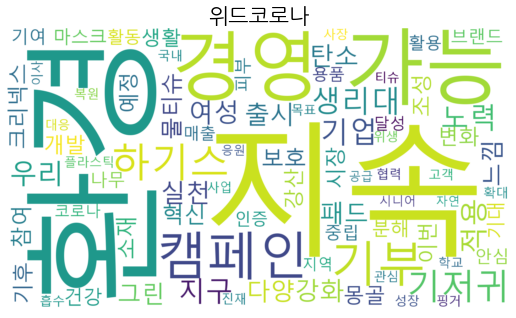

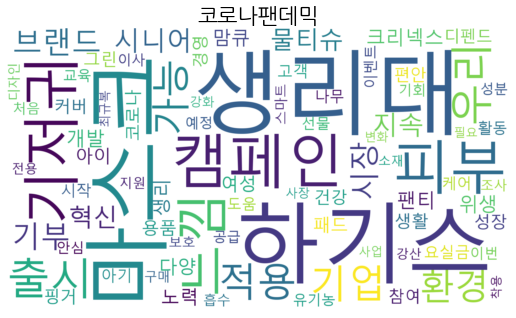

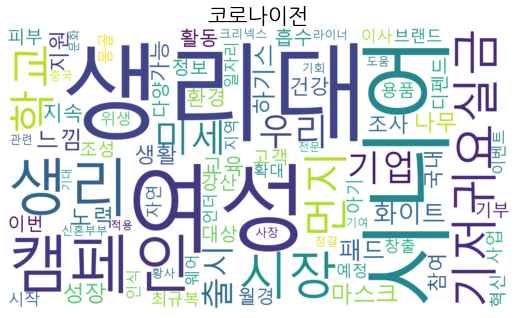

In [67]:
#wordcloud
import wordcloud
import matplotlib.pyplot as plt

N_WORDS = 80


wc = wordcloud.WordCloud(background_color="white", font_path = 'C:\WINDOWS\FONTS\MALGUN.TTF', max_words = N_WORDS, collocations=False, width=1920, height=1080)

for covid in covid_generation: #시기에 맞춰 워드클라우드를 각각 만들기 위함
    wc.generate_from_frequencies(body_word_counts_covid[covid]) #단어와 빈도가 함께 있는 body_word_counts_covid 사용. 

    plt.imshow(wc, interpolation= 'bilinear') 
    plt.axis('off') #축 숨기기
    plt.gcf().set_size_inches(9,10)
    plt.title(covid)
    plt.show()

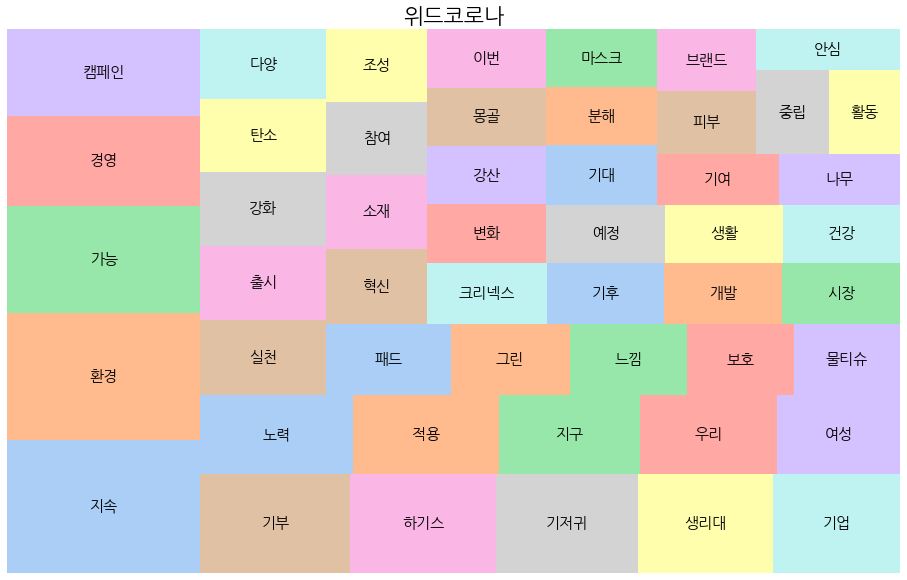

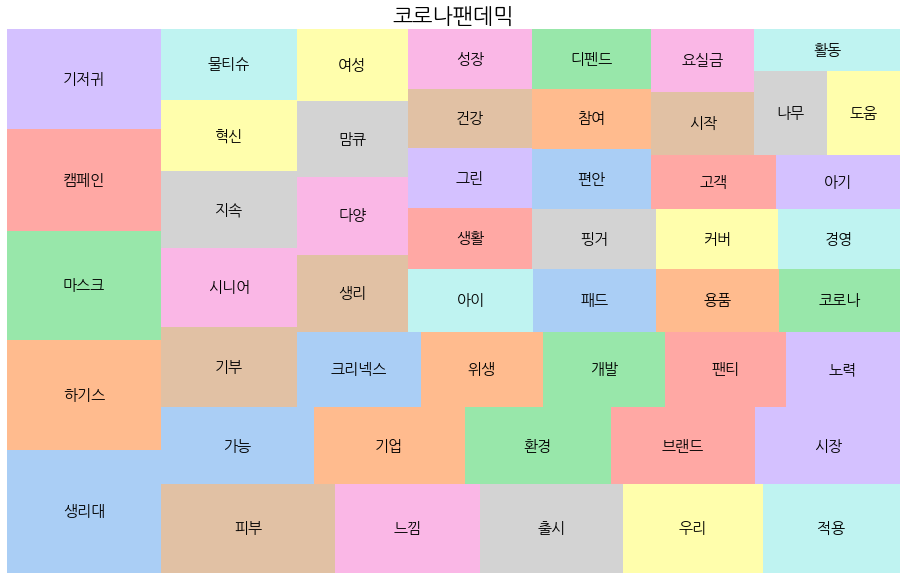

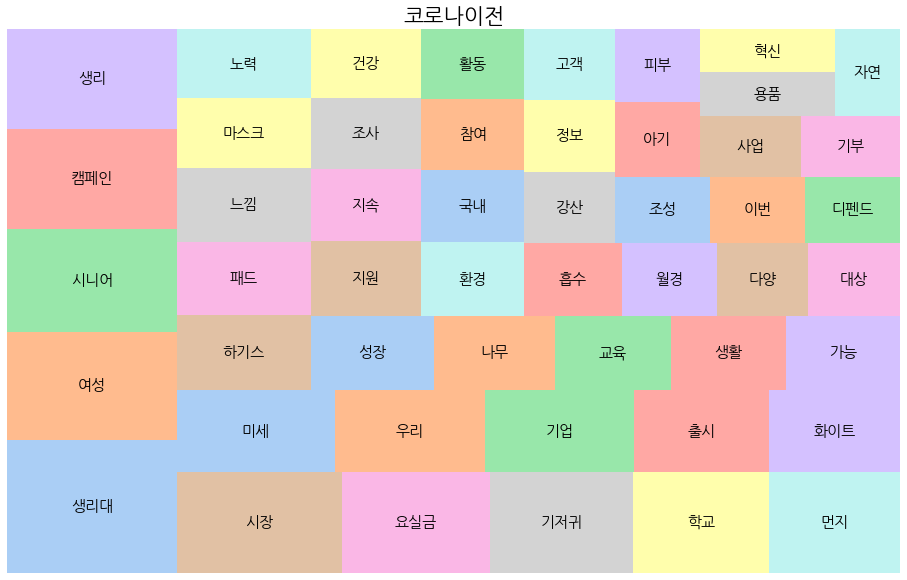

In [60]:
#squarify
import sys
import squarify
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

N_WORDS = 50
COLORS = sns.color_palette("pastel")
plt.rc('font', family="NanumGothic", size=18)

wc = wordcloud.WordCloud(background_color="white", max_words = N_WORDS, collocations=False, width=1920, height=1080)

for covid in covid_generation:
    word_count_pairs = body_word_counts_covid[covid].most_common(N_WORDS)
    words, counts = zip(*word_count_pairs)
    squarify.plot(sizes=counts, label=words, color=COLORS, alpha=0.9,text_kwargs={'fontsize': 15})
    plt.axis("off")
    plt.title(covid)
    plt.gcf().set_size_inches(16, 10)
    plt.show()

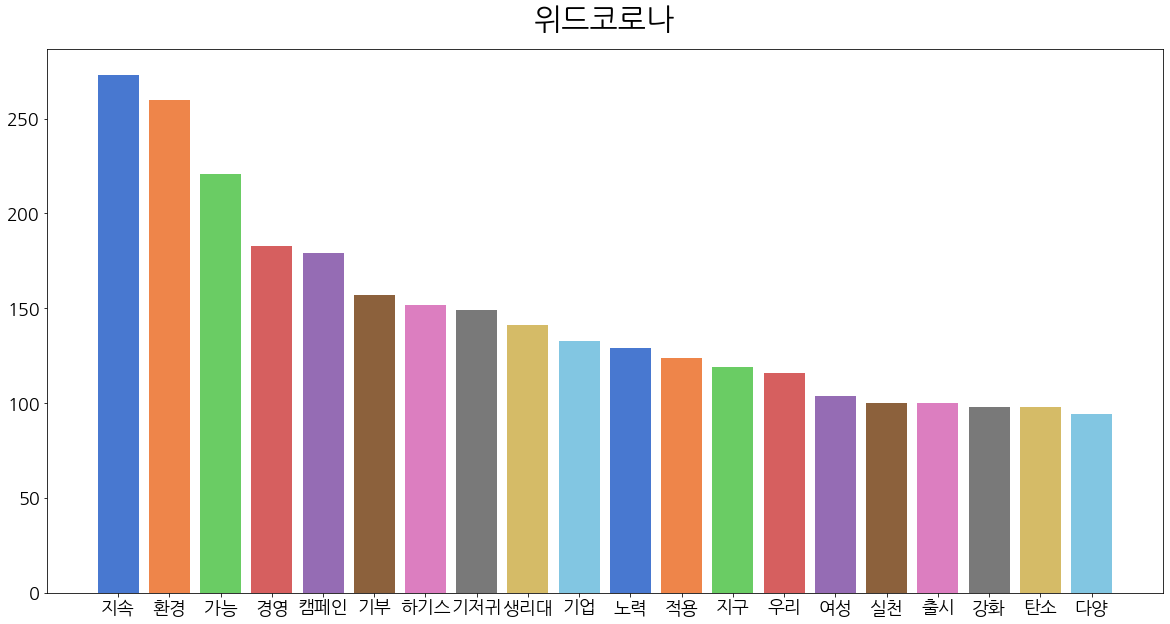

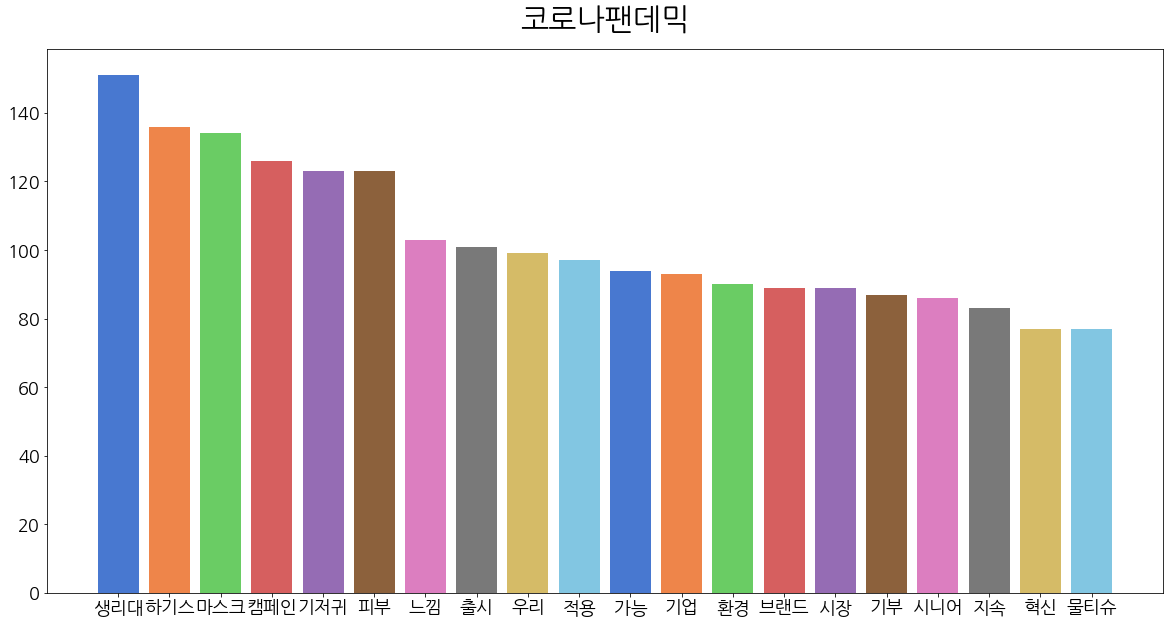

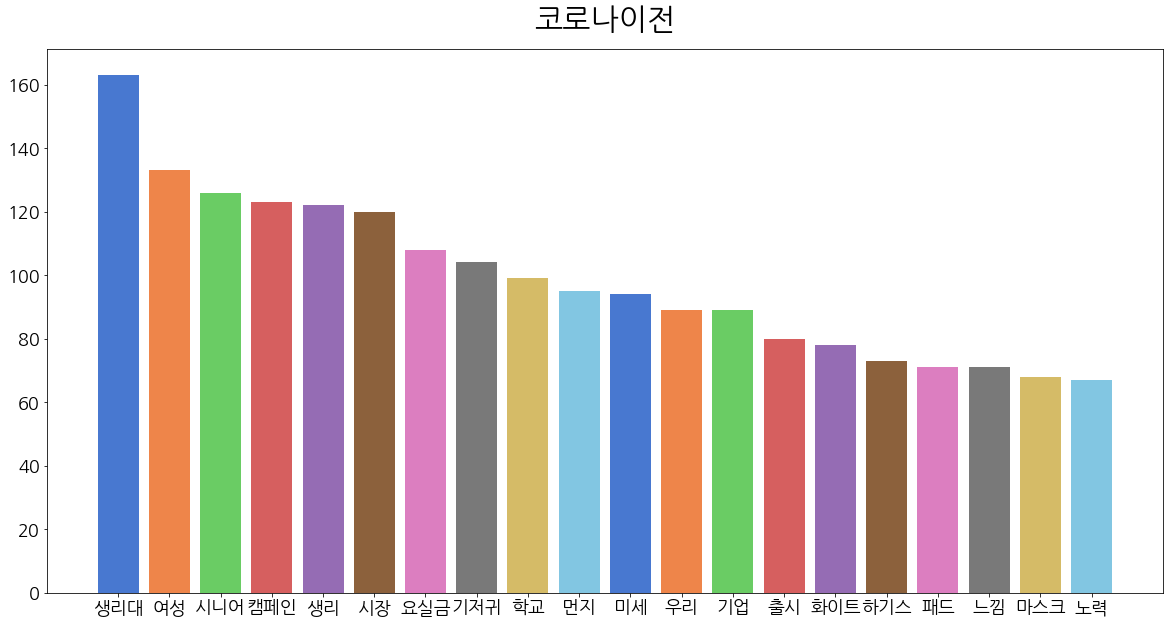

In [83]:
#막대그래프
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams['axes.titlepad'] = 20
rcParams['font.size'] = 18
plt.rc('font', family="NanumGothic", size=18)
COLORS = sns.color_palette("muted")

for covid in covid_generation:
    plt.figure(figsize=(20, 10))
    plt.title(covid, fontsize = 30)
    labels, counts = zip(*body_word_counts_covid[covid].most_common(20))
    plt.bar(labels, counts, color=COLORS)
    plt.show()